# Python 的 50+ 練習：資料科學學習手冊

> 起步走

[數聚點](https://www.datainpoint.com) | 郭耀仁 <https://linktr.ee/yaojenkuo>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 關於視覺化

## 什麼是視覺化

視覺化是致力於將抽象性概念具體化的學科，透過圖形中的大小、顏色或形狀等元素把原始資料、函數或方程式等所蘊含的特徵表達給瀏覽的人，進而將抽象的資訊轉換為溝通對象能快速掌握理解的精簡內容。

>The simple graph has brought more information to the data analyst’s mind than any other device.
>
>[John Tukey](https://en.wikipedia.org/wiki/John_Tukey)

## 資料視覺化將資料值映射為 "Aesthetics"

常見的 "Aesthetics" 有

- 位置。
- 大小。
- 線條的寬度。
- 形狀。
- 顏色。
- 線條的樣式。

## 不同型態的資料值

- 數值：連續、浮點數。
- 數值：離散、整數、具有固定間隔的浮點數。
- 類別：無序或有序的因素、文字。
- 日期、時間、日期時間。

## 為什麼資料需要視覺化

視覺化在探索性資料分析中佔有舉足輕重的地位，因為對人來說原始資料是相當抽象的。

## 抽象的原始資料

例如在「資料科學模組 NumPy 入門」章節我們透過 `np.random` 建立的隨機 `ndarray`

In [2]:
m = 10000
uniform_ndarray = np.random.random(m)
normal_ndarray = np.random.normal(0, 1, m)
randint_ndarray = np.random.randint(1, 7, size=m)
print(uniform_ndarray)
print(normal_ndarray)
print(randint_ndarray)

[0.4618574  0.15981848 0.65283444 ... 0.80196969 0.61300434 0.25206932]
[ 0.01545379 -0.15639902 -0.53487083 ... -1.45836505  0.05054807
  1.16489839]
[1 2 6 ... 3 4 4]


## 將原始資料視覺化

In [3]:
def show_uniform_ndarray(arr):
    fig = plt.figure()
    ax = plt.axes()
    ax.hist(arr, bins=50)
    plt.show()

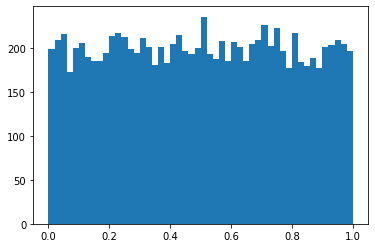

In [4]:
show_uniform_ndarray(uniform_ndarray)

## 將原始資料視覺化（續）

In [5]:
def show_normal_ndarray(arr):
    fig = plt.figure()
    ax = plt.axes()
    ax.hist(arr, bins=50)
    plt.show()

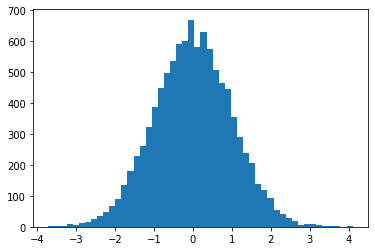

In [6]:
show_normal_ndarray(normal_ndarray)

## 將原始資料視覺化（續）

In [7]:
def show_randint_ndarray(arr):
    fig = plt.figure()
    ax = plt.axes()
    uniques, counts = np.unique(arr, return_counts=True)
    ax.bar(uniques, counts)
    plt.show()

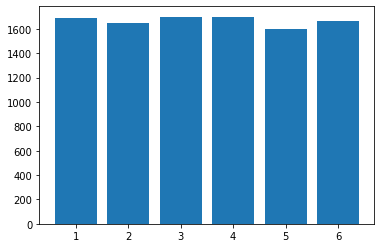

In [8]:
show_randint_ndarray(randint_ndarray)

## 抽象的數學式

\begin{equation}
S(x) = \frac{1}{1 + e^{-x}}
\end{equation}

In [9]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def plot_sigmoid(x_arr, y_arr):
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(x_arr, y_arr)
    ax.set_xticks([])
    ax.set_yticks([0, 0.5, 1])
    ax.set_yticklabels(['0', '0.5', '1'])
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.set_title('$S(x) = 1/(1+e^{-x})$')
    plt.show()

x = np.linspace(-10, 10)
S = sigmoid(x)

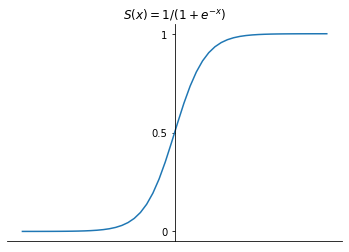

In [10]:
plot_sigmoid(x, S)

## 資料科學家利用線圖描述損失函數（Loss functions）

In [11]:
def plot_cross_entropy(x_arr):
    y0 = -np.log(1-x_arr)
    y1 = -np.log(x_arr)
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(x_arr, y0, label="$-log(1 - h_{\\theta}(X))$ if y = 0")
    ax.plot(x_arr, y1, label="$-log(h_{\\theta}(X))$ if y = 1")
    ax.legend()
    ax.set_title("Cross Entropy")
    ax.set_xlabel("$h_{\\theta}(X)$")
    ax.set_ylabel("Cost")
    plt.show()
    
x = np.linspace(0.0001, 0.9999, 1000)

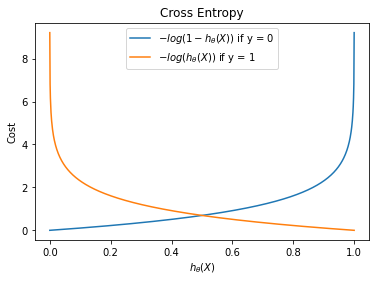

In [12]:
plot_cross_entropy(x)

## 資料科學家利用表面圖描述梯度（Gradients）

![Imgur](https://i.imgur.com/qMsNwXx.png)

來源：[Coursera | Machine Learning](https://www.coursera.org/learn/machine-learning)

## 資料科學家也利用等高線圖描述梯度

![Imgur](https://i.imgur.com/qmeRAdf.png)

來源：[Coursera | Machine Learning](https://www.coursera.org/learn/machine-learning)

## 或者利用填滿等高線圖描述決策邊界（Decision boundary）

來源：<https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py>

In [13]:
from itertools import product
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

def plot_multiple_decision_boundary():
    # Loading some example data
    iris = datasets.load_iris()
    X = iris.data[:, [0, 2]]
    y = iris.target

    # Training classifiers
    clf1 = DecisionTreeClassifier(max_depth=4)
    clf2 = KNeighborsClassifier(n_neighbors=7)
    clf3 = SVC(gamma=.1, kernel='rbf', probability=True)
    eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2),
                                        ('svc', clf3)],
                            voting='soft', weights=[2, 1, 2])

    clf1.fit(X, y)
    clf2.fit(X, y)
    clf3.fit(X, y)
    eclf.fit(X, y)

    # Plotting decision regions
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

    for idx, clf, tt in zip(product([0, 1], [0, 1]),
                            [clf1, clf2, clf3, eclf],
                            ['Decision Tree (depth=4)', 'KNN (k=7)',
                             'Kernel SVM', 'Soft Voting']):

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
        axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                      s=20, edgecolor='k')
        axarr[idx[0], idx[1]].set_title(tt)

    plt.show()

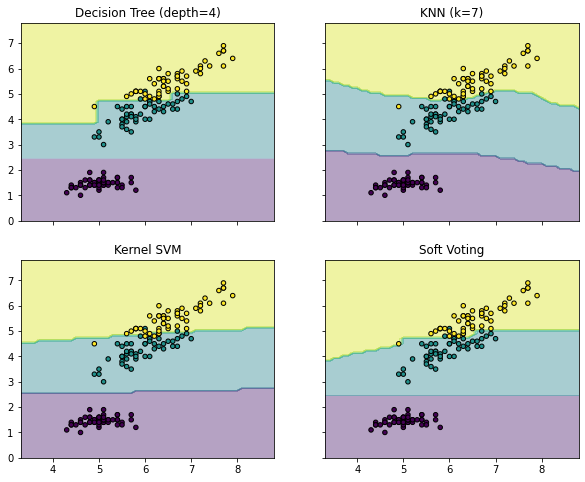

In [14]:
plot_multiple_decision_boundary()

## 好的視覺化特性

- 具有資訊價值。
- 能夠自我解釋。
- 可以重製。
- 經典視覺化：
    - [Charles Minard's map of Napoleon's disastrous Russian campaign of 1812](https://en.wikipedia.org/wiki/Charles_Joseph_Minard#/media/File:Minard.png)
    - [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://youtu.be/jbkSRLYSojo)

## 現代資料科學：以程式設計做資料科學的應用

![](r-for-data-science.png)

來源：[R for Data Science](https://r4ds.had.co.nz)

## 什麼是資料科學的應用場景

- Import 資料的載入。
- Tidy 資料清理。
- Transform 資料外型與類別的轉換。
- Visualise 探索性分析。
- Model 分析與預測模型。
- Communicate 溝通分享。

## 如何選擇資料視覺化的工具

- 能夠 "Wrangle" 資料。
- 能夠將資料值映射為 "Aesthetics"
- 能夠作為溝通的媒介。

## 瞭解資料科學從業者的偏好

- [2021 Kaggle ML & DS Survey](https://www.kaggle.com/c/kaggle-survey-2021)
- [Stack Overflow Trends](https://insights.stackoverflow.com/trends)

## 根據 [2021 Kaggle ML & DS Survey](https://www.kaggle.com/c/kaggle-survey-2021) 中的幾個問題

- What programming languages do you use on a regular basis? (Select all that apply)
- What programming language would you recommend an aspiring data scientist to learn first?
- What data visualization libraries or tools do you use on a regular basis? (Select all that apply)
- Which of the following business intelligence tools do you use most often?

In [15]:
import ks2021

csv_file = "https://kaggle-ml-ds-survey.s3.ap-northeast-1.amazonaws.com/kaggle-survey-2021/kaggle_survey_2021_responses.csv"
ks = ks2021.KaggleSurvey2021(csv_file)
ks.generate_question_table()

,question_index,question_description,question_type
0,Q1,What is your age (# years)?,multiple choice
1,Q2,What is your gender?,multiple choice
2,Q3,In which country do you currently reside?,multiple choice
3,Q4,What is the highest level of formal education ...,multiple choice
4,Q5,Select the title most similar to your current ...,multiple choice
5,Q6,For how many years have you been writing code ...,multiple choice
6,Q7,What programming languages do you use on a reg...,multiple selection
7,Q8,What programming language would you recommend ...,multiple choice
8,Q9,Which of the following integrated development ...,multiple selection
9,Q10,Which of the following hosted notebook product...,multiple selection


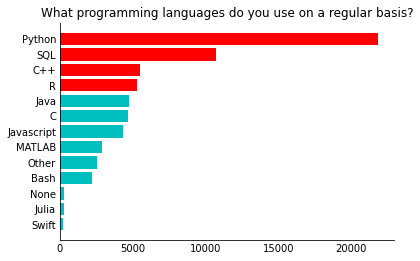

In [16]:
ks.plot_survey_summary(question_index="Q7", n=4)

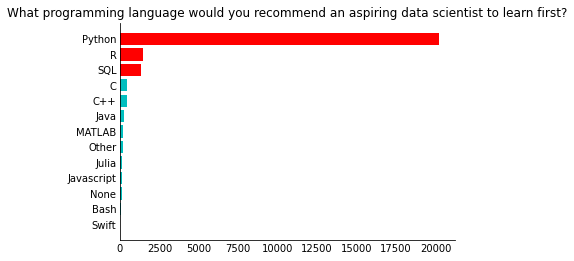

In [17]:
ks.plot_survey_summary(question_index="Q8", n=3)

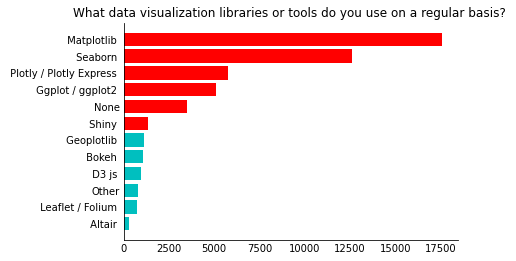

In [18]:
ks.plot_survey_summary(question_index="Q14", n=6)

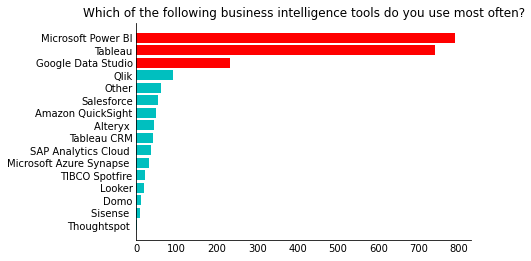

In [19]:
ks.plot_survey_summary(question_index="Q35", n=3)

## 根據 [Stack Overflow Trends](https://insights.stackoverflow.com/trends) 的幾個趨勢

- [程式語言](https://insights.stackoverflow.com/trends?tags=r%2Cpython%2Csql%2Cmatlab%2Cjulia)
- [視覺化模組](https://insights.stackoverflow.com/trends?tags=matplotlib%2Cseaborn%2Cplotly%2Cshiny%2Cggplot2%2Cplotly-dash)

## 資料視覺化的工具選擇依據

- 使用人數的多寡。
- 使用彈性。
- 互動性。
- 可重製性。

## 資料視覺化 123

1. 取得資料。
2. 清理轉換資料為合適的格式、外型。
3. 將資料映射為 "Aesthetics"

> When it comes to making graphs, half the battle occurs before you call any graphing commands.
>
> [Winston Chang](https://twitter.com/winston_chang?lang=en)

## 取得資料

- 常見的資料格式：
    - 純文字檔案。
    - 試算表。
    - 關聯式資料庫。
- 相關 Python 模組：
    - [Requests](https://requests.readthedocs.io/en/latest/)
    - [BeautifulSoup4](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
    - [Pandas](https://pandas.pydata.org/)
    - [SQLAlchemy](https://www.sqlalchemy.org/)

## 清理轉換資料為合適的格式、外型

- 手動：MS Excel/Google Sheet
- 相關 Python 模組：
    - [NumPy](https://numpy.org/)
    - [Pandas](https://pandas.pydata.org/)

## 將資料映射為 "Aesthetics"

- 靜態：[Matplotlib](https://matplotlib.org/)、[Seaborn](https://seaborn.pydata.org/)
- 地理資訊：[GeoPandas](https://geopandas.org/en/stable/)、[Folium](https://python-visualization.github.io/folium/)
- 動態：[Plotly](https://plotly.com/)
- 網頁應用程式：[Streamlit](https://streamlit.io/)